In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
insurance = "/content/drive/MyDrive/notebooks /insurance.csv"
insu = pd.read_csv(insurance)

In [3]:
insu

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#chechking for datatype
insu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


checking for data type


In [5]:
#checking for missing values
insu.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

checking for na

In [6]:
#Checking the distribution of categorical data
print(insu.sex.value_counts())

male      676
female    662
Name: sex, dtype: int64


In [7]:
#Checking the distribution of categorical data
print(insu.region.value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [8]:
#Checking the distribution of categorical data
print(insu.smoker.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


<ipython-input-9-ef81a887862a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(insu.corr())


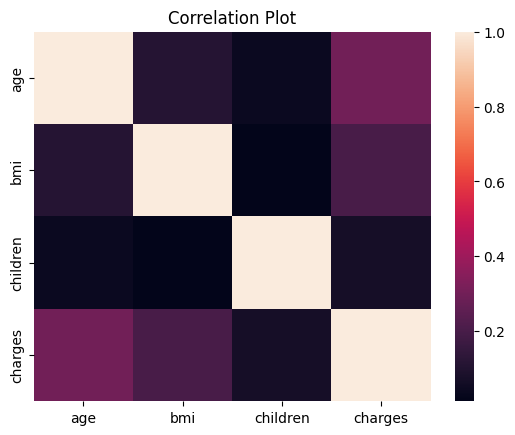

In [9]:
#Correlation plot
sns.heatmap(insu.corr())
plt.title('Correlation Plot')
plt.show()

Created correlation plot, we can see that there are variables who are slighly correlated.

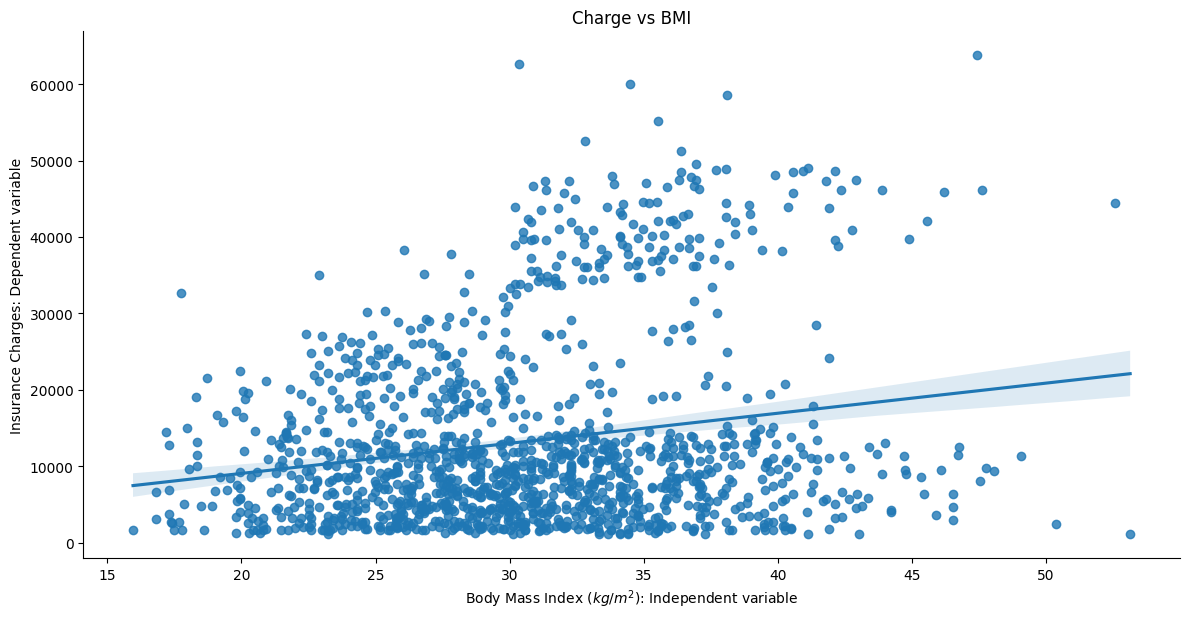

In [10]:

#visualize charge vs bmi in a line plot.
sns.lmplot(x='bmi', y='charges', data=insu, aspect=2, height=6)
plt.xlabel('Body Mass Index $(kg/m^2)$: Independent variable')
plt.ylabel('Insurance Charges: Dependent variable')
plt.title('Charge vs BMI')

plt.show()


We can see that as the BMI increases, tthe charges slightly increases.

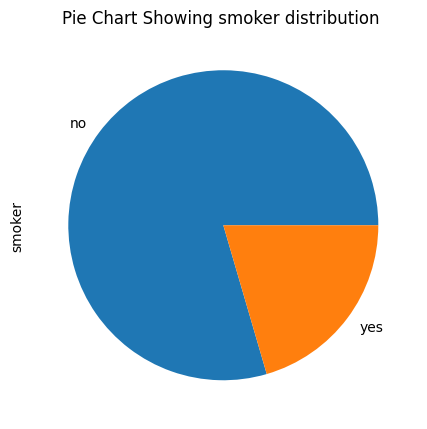

In [11]:
#Plotting the distribution of the smoker Types
data = insu.smoker.value_counts()
smoker_count  = insu['smoker'].value_counts()
plt.figure(figsize=(5,10))
data.plot.pie( title = 'Pie Chart Showing smoker distribution ')
plt.show()

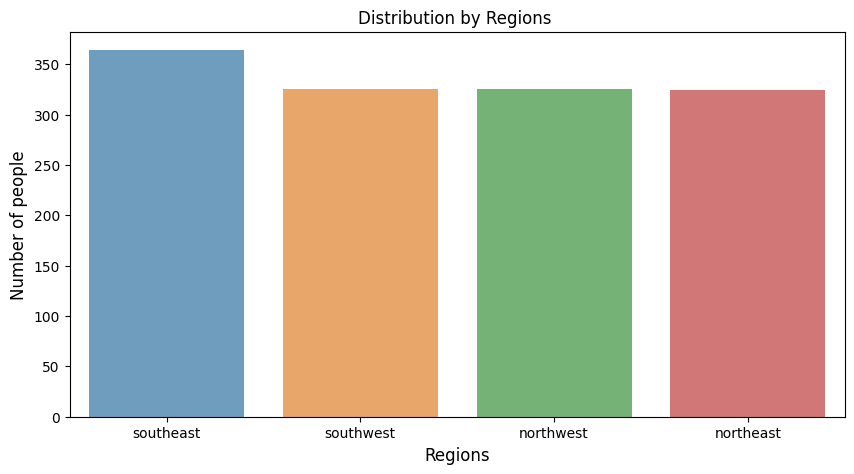

In [12]:
#Plotting the distribution of the Transmissions
region_count  = insu['region'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = region_count.index , y= region_count.values,  alpha=0.7)
plt.title('Distribution by Regions ')
plt.ylabel('Number of people', fontsize=12)
plt.xlabel('Regions', fontsize=12)
plt.show()

In [13]:
#recoding the column
region_coded =  pd.get_dummies(insu['region'])
region_coded

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [14]:
#dropping the region column since it is categorical.
insu = insu.drop(['region'], axis = 1)

In [15]:
insu

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [16]:
#setting Target
Y = insu['charges']

In [17]:
#dropping target feature from the dataset.
insu = insu.drop(['charges'], axis = 1)

In [18]:
#combining the regions_coded with the insurance dataset
insu = pd.concat([insu, region_coded], axis=1)

In [19]:
insu

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,0,0,0,1
1,18,male,33.770,1,no,0,0,1,0
2,28,male,33.000,3,no,0,0,1,0
3,33,male,22.705,0,no,0,1,0,0
4,32,male,28.880,0,no,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,0,1,0,0
1334,18,female,31.920,0,no,1,0,0,0
1335,18,female,36.850,0,no,0,0,1,0
1336,21,female,25.800,0,no,0,0,0,1


In [20]:
#encoding sex
sex_encoded = pd.get_dummies(insu['sex'], drop_first=True)


In [21]:
#dropped sex column from the dataset.
insu = insu.drop('sex', axis=1)

In [22]:
#I merged the sex_encoded to the dataset.
insu = insu.join(sex_encoded)

In [23]:
insu

,age,bmi,children,smoker,northeast,northwest,southeast,southwest,male
0,19,27.900,0,yes,0,0,0,1,0
1,18,33.770,1,no,0,0,1,0,1
2,28,33.000,3,no,0,0,1,0,1
3,33,22.705,0,no,0,1,0,0,1
4,32,28.880,0,no,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,0,1,0,0,1
1334,18,31.920,0,no,1,0,0,0,0
1335,18,36.850,0,no,0,0,1,0,0
1336,21,25.800,0,no,0,0,0,1,0


In [24]:
#encoded smoker column
smoker_encoded = pd.get_dummies(insu['smoker'], drop_first=True)


In [25]:
#dropped the smoker column
insu = insu.drop('smoker', axis = 1)

In [26]:
insu = insu.join(smoker_encoded)

In [27]:
#now setting the dataset to X
X = insu

In [28]:
X

,age,bmi,children,northeast,northwest,southeast,southwest,male,yes
0,19,27.900,0,0,0,0,1,0,1
1,18,33.770,1,0,0,1,0,1,0
2,28,33.000,3,0,0,1,0,1,0
3,33,22.705,0,0,1,0,0,1,0
4,32,28.880,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,0,0,1,0
1334,18,31.920,0,1,0,0,0,0,0
1335,18,36.850,0,0,0,1,0,0,0
1336,21,25.800,0,0,0,0,1,0,0


In [29]:
#looking at the Y- target
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [30]:
#splitting the dataset into training and testing.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state=2)

In [31]:
from sklearn.linear_model import LinearRegression

#Loading the Linear Regression Model
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

In [32]:
#Model Evaluation
#Let's test our model on our training data
y_pred = LR.predict(X_test)

In [33]:
#getting the coefficients.
coefficients = LR.coef_
print(f'Coefficients {coefficients}')

Coefficients [  244.8081221    342.39565799   616.71242776   667.48898422
    84.98958638  -101.63454791  -650.84402269  -130.83783324
 23341.95158442]


In [34]:
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: -12250.255454599479


In [35]:
#R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.7642348545269875


In [36]:
#MS3
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 38108732.489800245


In [37]:
#RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 6173.227072593413


In [38]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

MAE 4292.580187720698
